# Assignment 7

### Roberto Cai Wu
### Ramesh Kumar

In [216]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.linalg

In [217]:
%matplotlib inline

In [229]:
class LQR:
    def __init__(self):
        self.length = 3 #length of pendulum
        self.g = 9.81 
        self.dt = 0.1 # step size
        self.U = np.zeros((1,51))  # for 50 step size
        self.theta_0 = np.array([-0.3,0.6]) # angular position and velocity
        self.A = np.array([[1, self.dt],
                           [-self.dt*self.g/self.length, 1]]) # input matrix
        self.B = np.array([[1,1]]) # control input
        self.Q = np.array([[1,0], 
                           [0,0.001]])
        self.R = np.array([[0.0001]]) # R to penalize actions 
        self.cov_noise = np.array([0.04,0.02]) # noise 
         
        # compute cost function    
    def cost_function(self, s, Q, R):
        self.J = np.dot(s,np.dot(Q,s.T)) + np.dot(self.U.T,np.dot(R,self.U))
        return self.J
    
        # compute ricatti
    def ricatti(self):
        phi= np.matrix(scipy.linalg.solve_discrete_are(self.A, self.B.T, self.Q, self.R))
        return phi
    
        # compute lqr gain
    def lqr_gain(self, phi):
        L = np.matrix(scipy.linalg.inv(self.B*phi*self.B.T+self.R)*(self.B*phi*self.A))
        return -L
        
        # compute pendulum states
    def compute_pendulum_state(self, dt, theta, a_speed, N):
        self.theta = theta
        self.a_speed = a_speed
        xk = self.theta_0
        s = []
        s.append([self.theta,self.a_speed])
        for i in range(N):
            # update theta and angular speed
            self.theta += dt*(self.a_speed)         
            self.a_speed += dt*-np.sin(self.theta)*self.g/self.length
            s.append([self.theta,self.a_speed])
        return s  
    
    
    def linearized_pendulum(self, dt,theta,a_speed, N):
        self.theta = theta
        self.a_speed = a_speed
        s = []
        s.append([self.theta,self.a_speed])
        for i in range(N):
            self.theta += dt*(self.a_speed)         
            self.a_speed += dt*(-self.theta)*self.g/self.length
            s.append([self.theta,self.a_speed])
        return s  
    
    
    def lqr(self, N):
        
        phi = self.ricatti()
        L = np.asarray(self.lqr_gain(phi)).T # gain
        xk = self.theta_0  # states: angular speed and position
        xk.shape = (2,1)
        s = []
        for i in range(N):
            uk = L*xk  # compute policy
            s.append([xk[0][0],xk[1][0]])
            xk = (np.dot(self.A,xk)) + (self.B.T*uk) # compute states 
        return s
    
    # add zero mean gaussian noise 
    def lqr_gaussian_noise(self, N):
        
        phi = self.ricatti()
        L = np.asarray(self.lqr_gain(phi)).T
        xk = self.theta_0
        xk.shape = (2,1)
        s = []
        # zero mean 
        mean = np.array([0,0])
        for i in range(N):
            uk = L*xk
            s.append([xk[0][0],xk[1][0]])
            noise = np.random.normal(mean, self.cov_noise) # guassian noise
            xk = (np.dot(self.A,xk)) + (self.B.T*uk) + noise # add noise to state
        return s

# Ex 7.1

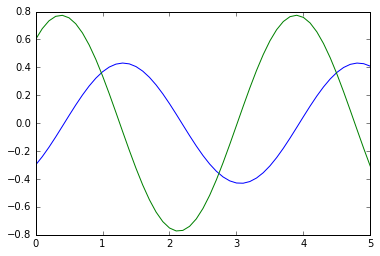

In [230]:
obj = LQR()
time_step = 0.1
N = 50
initial_theta = -0.3
initial_velocity = 0.6
s = obj.compute_pendulum_state(time_step,initial_theta,initial_velocity,N)
s = np.asarray(s)
pd.DataFrame(s)
plt.figure()
x = np.linspace(0,5,51)
plt.plot(x,s[:,0])
plt.plot(x,s[:,1])

In [231]:
pd.DataFrame(s)

,0,1
0,-0.300000,0.600000
1,-0.240000,0.677729
2,-0.172227,0.733769
3,-0.098850,0.766040
4,-0.022246,0.773314
5,0.055085,0.755311
6,0.130616,0.712720
7,0.201888,0.647150
8,0.266603,0.561000
9,0.322703,0.457298


# Ex. 7.2

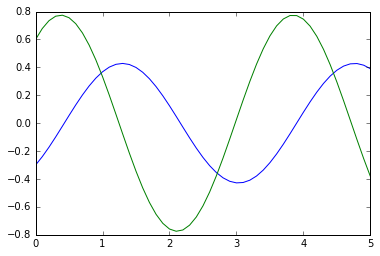

In [232]:
s1 = obj.linearized_pendulum(time_step,initial_theta,initial_velocity,N)
s1 = np.asarray(s1)
plt.figure()
x1 = np.linspace(0,5,51)
plt.plot(x1,s1[:,0])
# plt.plot(x,s[:,0])
plt.plot(x1,s1[:,1])

In [233]:
pd.DataFrame(s)

,0,1
0,-0.300000,0.600000
1,-0.240000,0.677729
2,-0.172227,0.733769
3,-0.098850,0.766040
4,-0.022246,0.773314
5,0.055085,0.755311
6,0.130616,0.712720
7,0.201888,0.647150
8,0.266603,0.561000
9,0.322703,0.457298


# Ex. 7.3

We consider 2 state outputs $\theta$ and $\omega$ and 1 state input $\a$

C = [ 1 , 1 ]

$Y = C s_t$

$Q = C^T C$

$R = [1]$

# Ex. 7.4 

In [234]:
phi = obj.ricatti()
L = obj.lqr_gain(phi)
s = obj.lqr(50)
s = np.asarray(s)
pd.DataFrame(s)

,0,1
0,-0.300000,0.600000
1,0.060372,0.638651
2,0.063790,0.555631
3,0.055484,0.479719
4,0.047903,0.414044
5,0.041345,0.357356
6,0.035684,0.308429
7,0.030799,0.266200
8,0.026582,0.229754
9,0.022942,0.198297


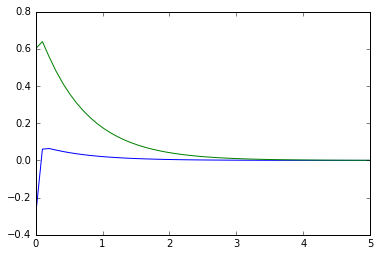

In [235]:
plt.figure()
x = np.linspace(0,5,50)
plt.plot(x,s[:,0])
plt.plot(x,s[:,1])

# Exercise 7.5

In [236]:
obj = LQR()
s = obj.lqr_gaussian_noise(50)
s = np.asarray(s)
pd.DataFrame(s)

,0,1
0,-0.300000,0.600000
1,0.085322,0.663601
2,0.105390,0.609086
3,0.091678,0.545174
4,0.052898,0.459673
5,0.086474,0.437403
6,0.023329,0.345484
7,-0.010825,0.258279
8,0.031803,0.242190
9,-0.082672,0.100942


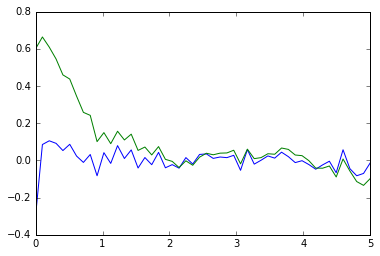

In [237]:
plt.figure()
x = np.linspace(0,5,50)
plt.plot(x,s[:,0])
plt.plot(x,s[:,1])